# **1. Perkenalan Dataset**


**Dataset**: Heart Disease Dataset dari Kaggle  
**Link**: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [2]:
# Load dataset
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1025, 14)


In [5]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **4. Exploratory Data Analysis (EDA)**

In [6]:
print("\n=== BASIC STATISTICS ===")
display(df.describe())


=== BASIC STATISTICS ===


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print("\n=== MISSING VALUES ===")
display(df.isnull().sum())


=== MISSING VALUES ===


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
print("\n=== DUPLICATE VALUES ===")
print(df.duplicated().sum())


=== DUPLICATE VALUES ===
723


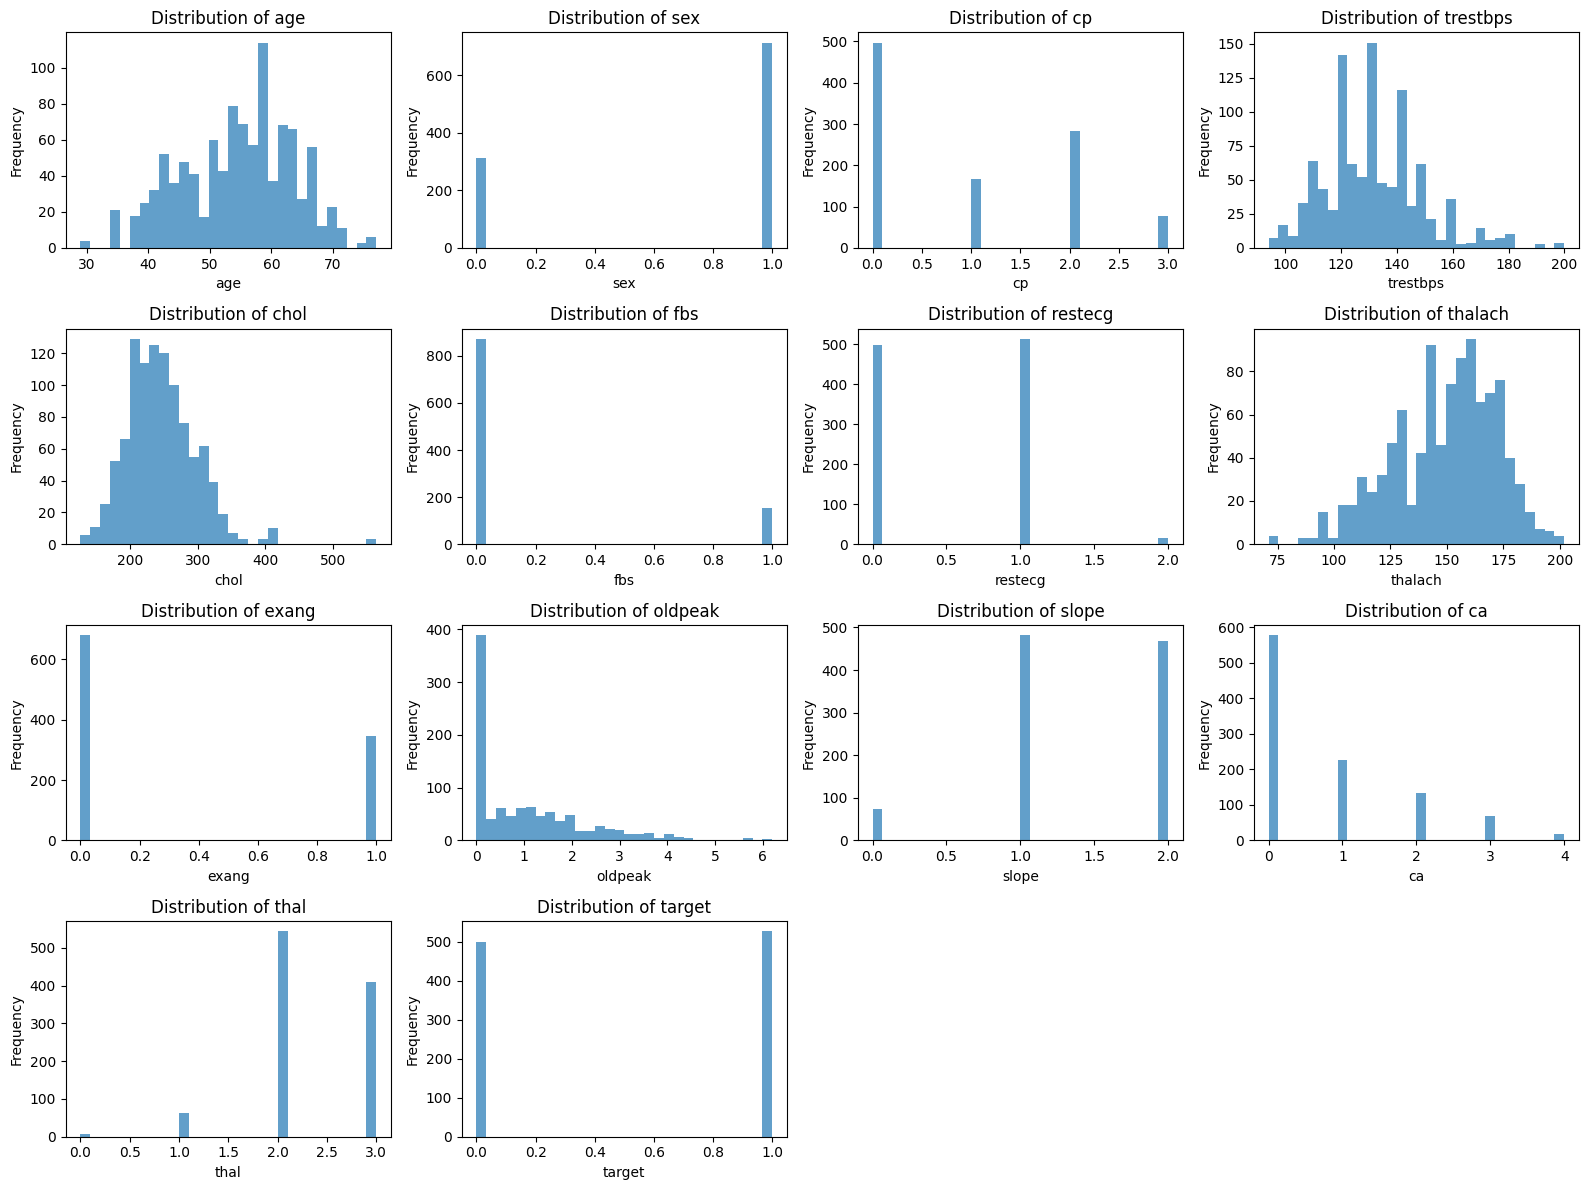

In [9]:
plt.figure(figsize=(16, 12))
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 4 # number of columns per row in the subplot
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # calculate number of rows needed

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.hist(df[col], bins=30, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

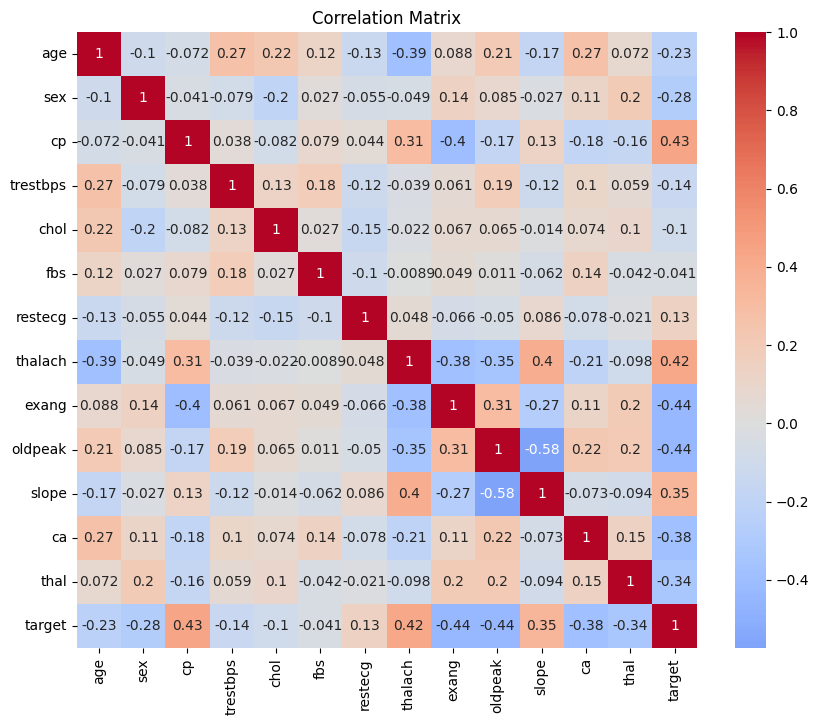

In [11]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

In [12]:
df_clean = df.copy()

# Encoding categorical variables
label_encoders = {}
for col in df_clean.select_dtypes(include=['object']).columns:
    if col != 'target':  # ganti dengan nama target Anda
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col])
        label_encoders[col] = le

In [13]:
# Feature scaling
scaler = StandardScaler()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

In [14]:
# Split data
X = df_clean.drop('target', axis=1)  # ganti dengan target Anda
y = df_clean['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (820, 13)
Test set shape: (205, 13)


In [17]:
# Save preprocessed data
X_train.to_csv('preprocessing/X_train.csv', index=False)
X_test.to_csv('preprocessing/X_test.csv', index=False)
y_train.to_csv('preprocessing/y_train.csv', index=False)
y_test.to_csv('preprocessing/y_test.csv', index=False)

In [7]:
!zip -r /content/preprocessing.zip preprocessing/
from google.colab import files
files.download('/content/preprocessing.zip')

  adding: preprocessing/ (stored 0%)
  adding: preprocessing/y_test.csv (deflated 96%)
  adding: preprocessing/X_test.csv (deflated 89%)
  adding: preprocessing/X_train.csv (deflated 92%)
  adding: preprocessing/y_train.csv (deflated 98%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>